In [1]:
!pip install geopandas

1. caricare i quartieri in un geodataframe

In [14]:
import geopandas as gpd

quartieri = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
quartieri.head(13)

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
6,20,LORETO - CASORETTO - NOLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5631.442413,1.747499e+06,95,"POLYGON ((9.23044 45.49250, 9.23090 45.49197, ..."
7,76,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96,"POLYGON ((9.13481 45.52095, 9.13481 45.52094, ..."
8,11,ISOLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5082.707418,1.322887e+06,97,"POLYGON ((9.20116 45.48963, 9.20086 45.48938, ..."
9,61,QUARTO CAGNINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4648.169991,9.863542e+05,98,"POLYGON ((9.11143 45.47640, 9.11193 45.47624, ..."


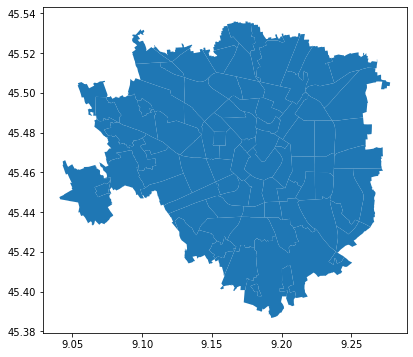

In [3]:
quartieri.plot(figsize=(20,6))

2. visualizzare l'intestazione

In [4]:
quartieri.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

4. visualizzare tutti i quartieri su una mappa di Milano

In [5]:
!pip install contextily

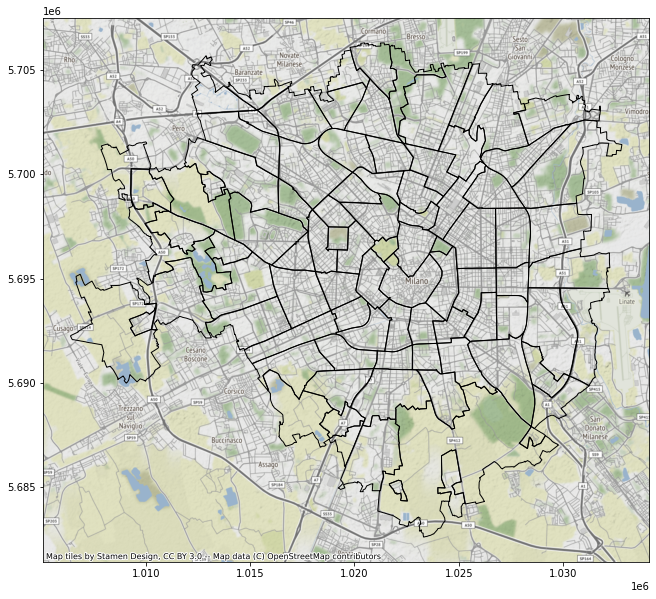

In [6]:
import contextily 
ax = quartieri.to_crs(epsg=3857).plot(figsize=(20,10), facecolor= "none", edgecolor = "k")
contextily.add_basemap(ax)

5. cercare il quartiere che contiene il Duomo di Milano

In [11]:
from shapely.geometry import Point

In [15]:
Duomo = Point(9.191383, 45.464211)
mask = quartieri.contains(Duomo)
quartieri[mask]


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene

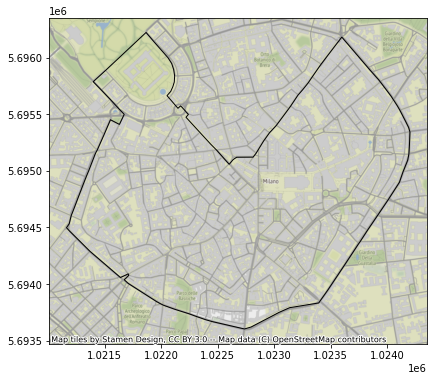

In [18]:
ax = quartieri[quartieri.contains(Duomo)].to_crs(epsg=3857).plot(figsize=(12,6), facecolor= "none", edgecolor = "k", markersize= 8)
contextily.add_basemap(ax)

7. visualizzare i quartieri vicini a quello che contiene il Duomo

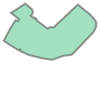

In [23]:
quartiere_duomo = quartieri[quartieri.contains(Duomo)].geometry.squeeze()
quartiere_duomo

In [41]:
quartieri_vicini = quartieri.touches(quartiere_duomo)
quartieri[quartieri_vicini]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
13,4,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102,"POLYGON ((9.20700 45.46787, 9.20712 45.46721, ..."
25,8,PARCO SEMPIONE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2966.984475,4.704203e+05,114,"POLYGON ((9.17958 45.47255, 9.17636 45.47043, ..."
34,6,PORTA TICINESE - CONCA DEL NAVIGLIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5293.159062,1.255017e+06,123,"POLYGON ((9.18740 45.45603, 9.18736 45.45584, ..."
60,5,PORTA VIGENTINA - PORTA LODOVICA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4710.382643,1.135196e+06,149,"POLYGON ((9.20186 45.45238, 9.20115 45.45196, ..."
79,7,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168,"POLYGON ((9.17538 45.46981, 9.17606 45.46932, ..."


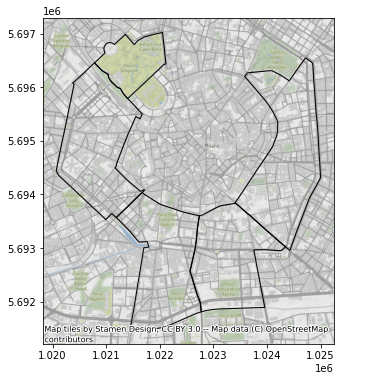

In [42]:
ax = quartieri[quartieri_vicini].to_crs(epsg=3857).plot(figsize=(12,6), facecolor= "none", edgecolor = "k")
contextily.add_basemap(ax)